
 --Linear Model Prediction--
 R2 Score train data: 0.6370689218672512
 R2 Score test data: 0.6075624829125714
 MAE test data: 155229.26112452924
 MSE test data: 38462363852.60016
 RMSE test data: 196118.23946945922

 --poly Model Prediction--
 R2 Score poly_train data: 0.6497485375776996
 R2 Score poly_test data: 0.6120783810887732
 MAE test data: 154863.8426470334
 MSE test data: 38019765703.31141
 RMSE test data: 194986.57826453442

 --Ridge Model Prediction--
 R2 Score Ridge_train data: 0.6370685241022404
 R2 Score Ridge_test data: 0.6075694642081972
 MAE test data: 155198.02106232985
 MSE test data: 38461679623.593414
 RMSE test data: 196116.4950318902

 --Lasso Model Prediction--
 R2 Score Lasso_train data: 0.6370689181349853
 R2 Score Lasso_train data: 0.6075609376230242
 MAE test data: 155226.88436260473
 MSE test data: 38462515304.70714
 RMSE test data: 196118.62559356043


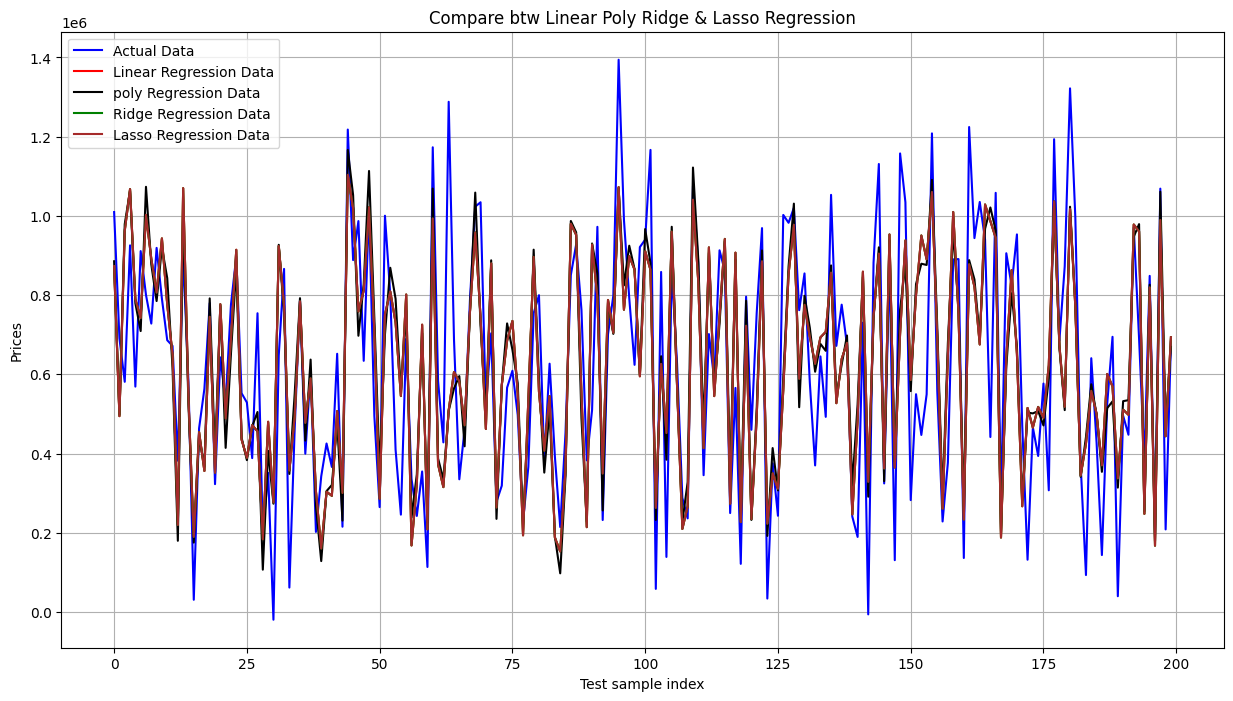

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Dataset load
df = pd.read_csv('HomeValueInsights.csv')

# Features (X) and Target (y)
x = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms',
        'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
y = df['House_Price']


np.random.seed(42)
noise=np.random.normal(0,200000,size=len(y))   # this is for adding noise to check which model score good
y=noise+y

# split into xtrain and xtest
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# ---- Apply Linear Regression ---
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

y_train_pred_linear=linear_model.predict(x_train)
y_test_pred_linear=linear_model.predict(x_test)
print("\n --Linear Model Prediction--")
print(" R2 Score train data:",r2_score(y_train,y_train_pred_linear))
print(" R2 Score test data:",r2_score(y_test,y_test_pred_linear))
print(" MAE test data:",mean_absolute_error(y_test,y_test_pred_linear))
print(" MSE test data:",mean_squared_error(y_test,y_test_pred_linear))
print(" RMSE test data:",np.sqrt(mean_squared_error(y_test,y_test_pred_linear)))
# print()

#----Apply polynomial Regression-----
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

y_train_pred_poly=poly_model.predict(x_train_poly)
y_test_pred_poly=poly_model.predict(x_test_poly)
print("\n --poly Model Prediction--")
print(" R2 Score poly_train data:",r2_score(y_train,y_train_pred_poly))
print(" R2 Score poly_test data:",r2_score(y_test,y_test_pred_poly))
print(" MAE test data:",mean_absolute_error(y_test,y_test_pred_poly))
print(" MSE test data:",mean_squared_error(y_test,y_test_pred_poly))
print(" RMSE test data:",np.sqrt(mean_squared_error(y_test,y_test_pred_poly)))

#----Apply Ridge Regression-----
ridge_model=Ridge(alpha=10)
ridge_model.fit(x_train,y_train)

ridge_model_y_train_pred=ridge_model.predict(x_train)
ridge_model_y_test_pred=ridge_model.predict(x_test)
print("\n --Ridge Model Prediction--")
print(" R2 Score Ridge_train data:",r2_score(y_train,ridge_model_y_train_pred))
print(" R2 Score Ridge_test data:",r2_score(y_test,ridge_model_y_test_pred))
print(" MAE test data:",mean_absolute_error(y_test,ridge_model_y_test_pred))
print(" MSE test data:",mean_squared_error(y_test,ridge_model_y_test_pred))
print(" RMSE test data:",np.sqrt(mean_squared_error(y_test,ridge_model_y_test_pred)))


#----Apply Lasso Regression-----
lasso_model=Lasso(alpha=10)
lasso_model.fit(x_train,y_train)

lasso_model_y_train_pred=lasso_model.predict(x_train)
lasso_model_y_test_pred=lasso_model.predict(x_test)
print("\n --Lasso Model Prediction--")
print(" R2 Score Lasso_train data:",r2_score(y_train,lasso_model_y_train_pred))
print(" R2 Score Lasso_train data:",r2_score(y_test,lasso_model_y_test_pred))
print(" MAE test data:",mean_absolute_error(y_test,lasso_model_y_test_pred))
print(" MSE test data:",mean_squared_error(y_test,lasso_model_y_test_pred))
print(" RMSE test data:",np.sqrt(mean_squared_error(y_test,lasso_model_y_test_pred)))
 
# Plotting
plt.figure(figsize=(15,8))
plt.plot(y_test.values,color='blue',label='Actual Data')
plt.plot(y_test_pred_linear,color='red',label='Linear Regression Data')
plt.plot(y_test_pred_poly,color='black',label='poly Regression Data')
plt.plot(ridge_model_y_test_pred,color='green',label='Ridge Regression Data')
plt.plot(lasso_model_y_test_pred,color='brown',label='Lasso Regression Data')
plt.title("Compare btw Linear Poly Ridge & Lasso Regression")
plt.xlabel('Test sample index')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()